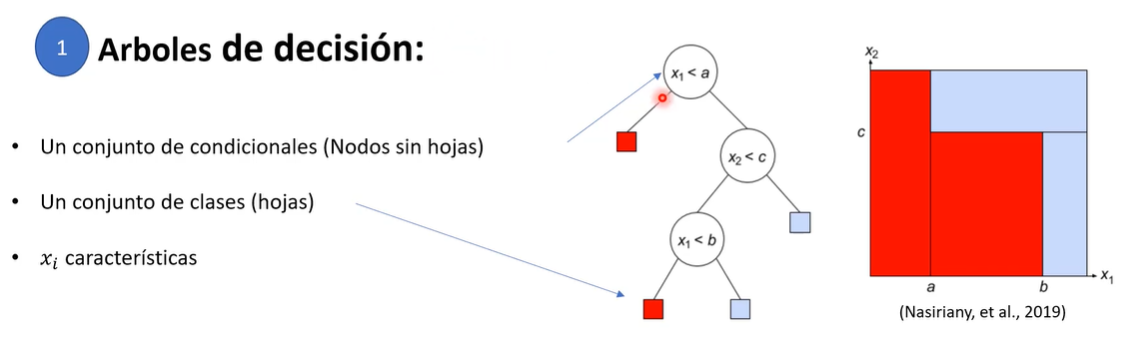

Es un modelo predicción basado en una seria de posbiles resultados ocurridos por la toma de decisiones. Este modelo puede ser representado por un árbol que contiene:

    1. Un conjunto de condicionales (Nodos sin hojas)
    2. Un conjunto de clases (Hojas)
    3. Un conjunto de características x



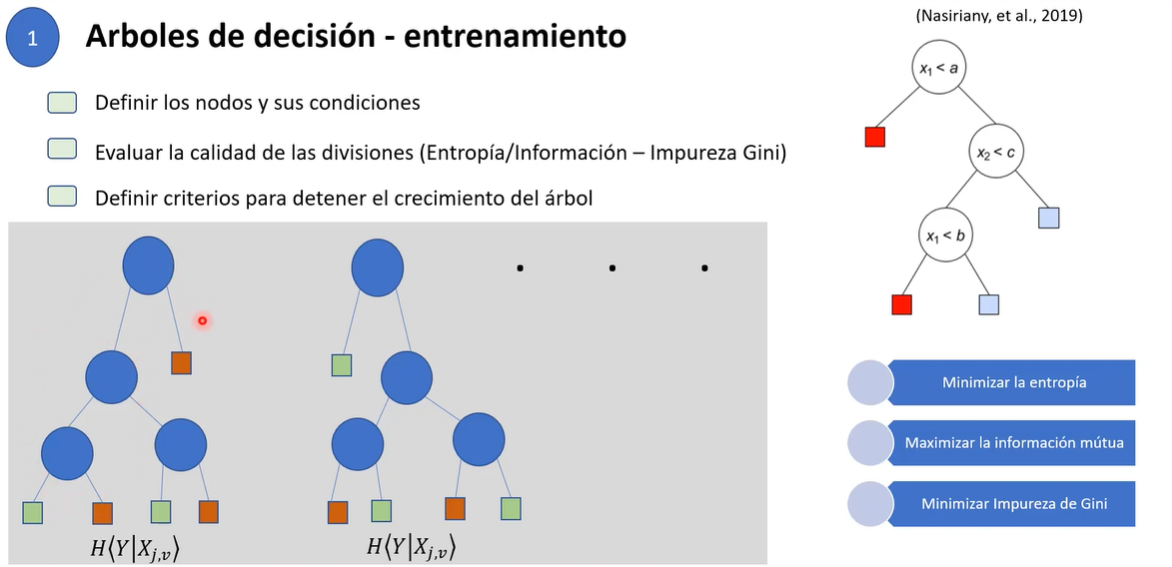

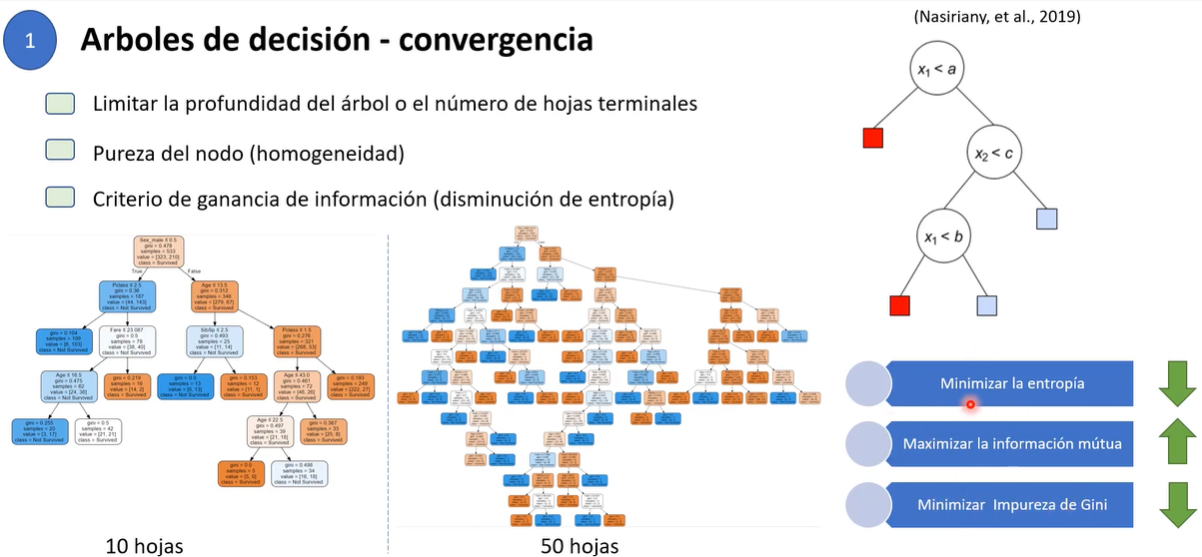

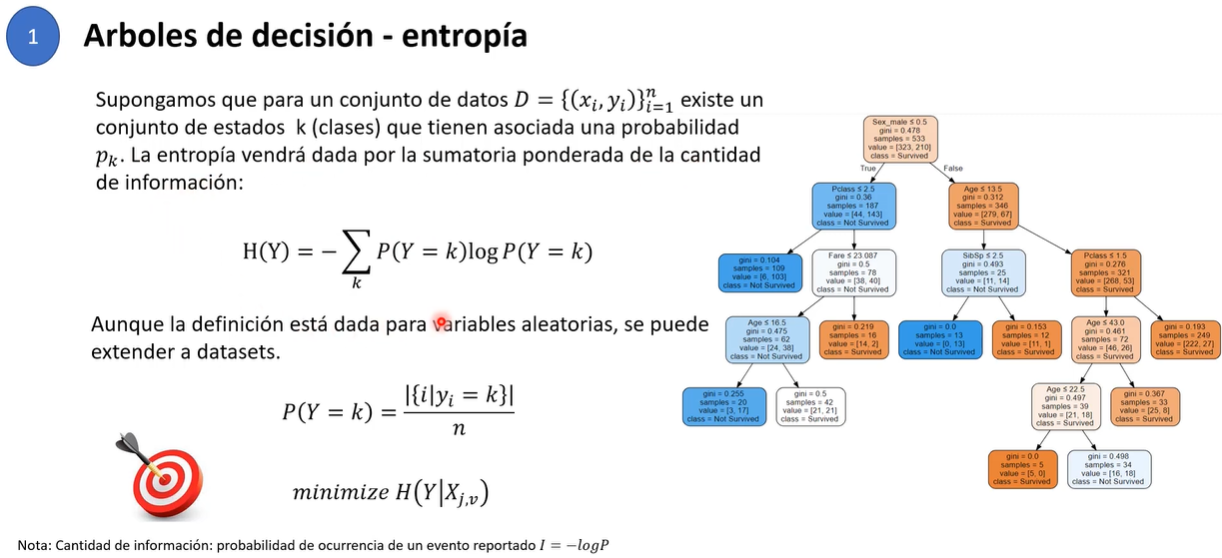

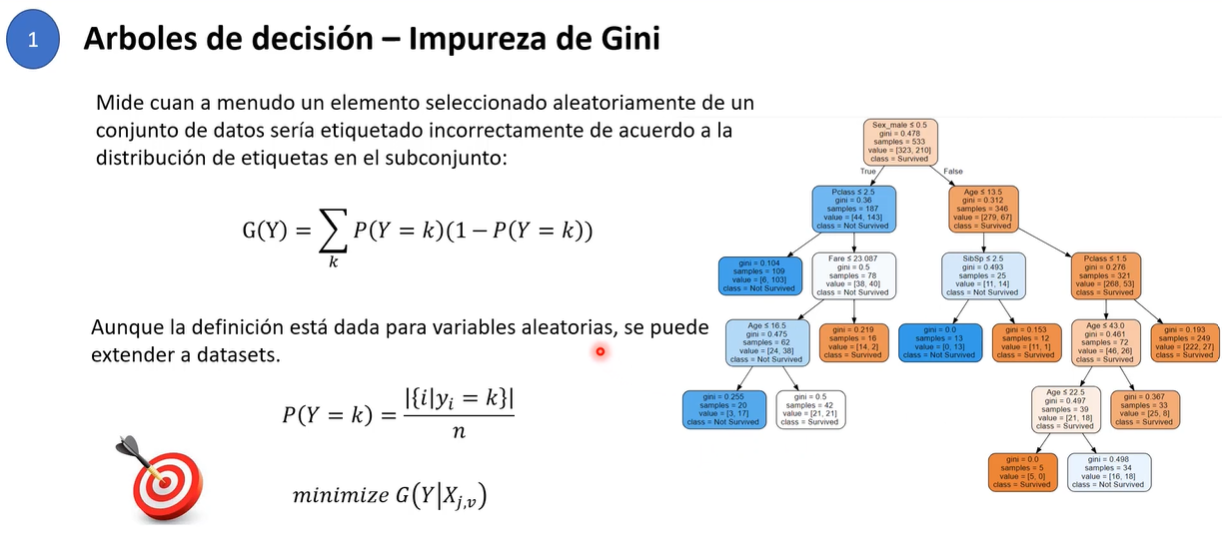

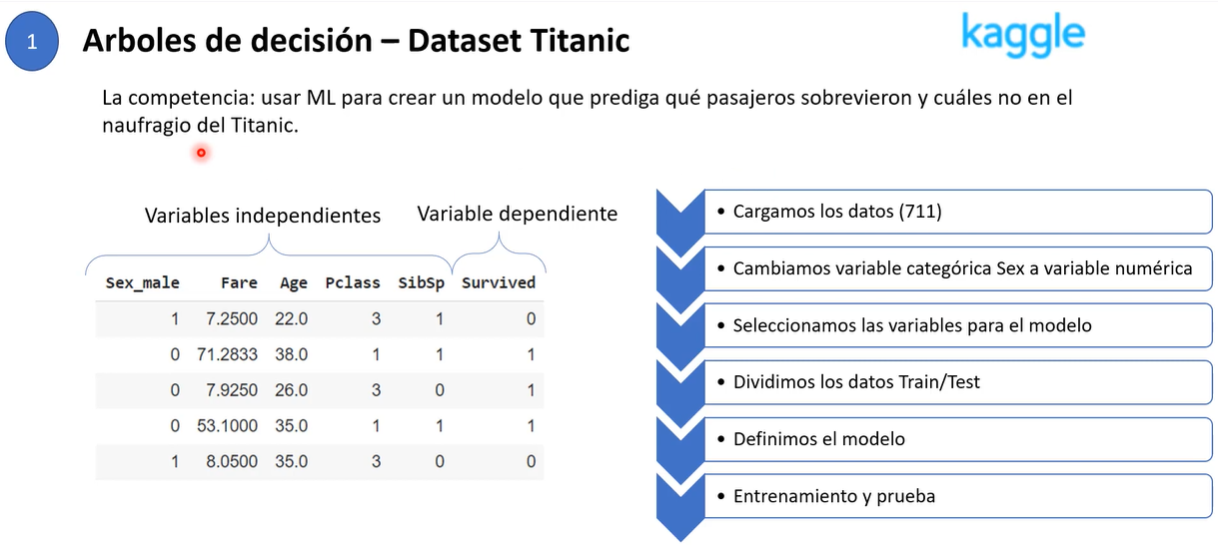

# 0. Implentación

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

# 1. Dataset Titanic

In [2]:
# Cargamos el dataset
df= pd.read_csv("/content/Titanic.csv") # en local cambie la ruta a '/Titanic.csv'
# Descripción genereal del conjunto de datos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.483826,0.403657,2.241913,29.621899,0.514768,0.431786,34.534323
std,258.849806,0.490976,0.836147,14.493108,0.931147,0.854517,52.968619
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Cambiamos la variable categórica Sex por la variable numérica Sex_male (Donde male = 1, fremale = 0)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
# Seleccionamos las características para el modelo
data = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0


In [6]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  711 non-null    uint8  
 1   Fare      711 non-null    float64
 2   Age       711 non-null    float64
 3   Pclass    711 non-null    int64  
 4   SibSp     711 non-null    int64  
 5   Survived  711 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 28.6 KB


In [7]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["Survived"],axis = 1)

# y es nuestra variable dependiente
y = data.Survived

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [8]:
# Creaamos el modelo de Arbol de Decisión (y configuramos el número máximo de nodos-hoja)
Dt_model = tree.DecisionTreeClassifier(max_leaf_nodes = 10)


## Entrenamiento

In [9]:
Dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualización del árbol

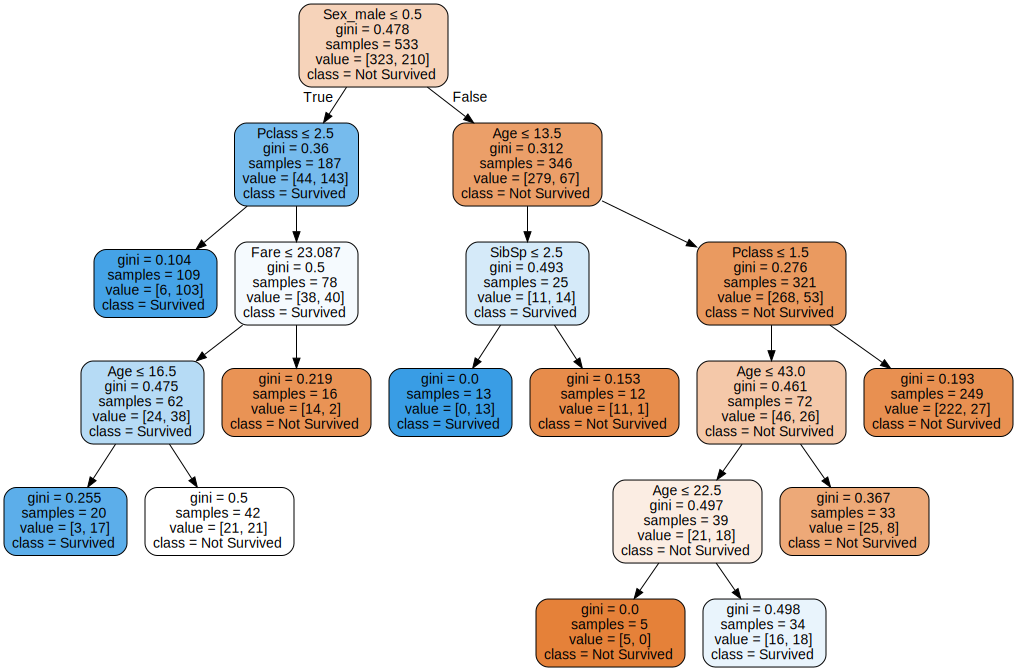

In [10]:
import graphviz 

dot_data = tree.export_graphviz(Dt_model, out_file=None, 
                         feature_names=X_train.columns.values,  
                         class_names=['Not Survived','Survived'],
                         filled=True, rounded=True,  
                         special_characters=True,leaves_parallel = False)  
graph = graphviz.Source(dot_data)  
graph 

## Exportar árbol

In [11]:
import pydot
(graph, ) = pydot.graph_from_dot_data(dot_data)
# Write graph to a png file
graph.write_png('tree.png') 

## Accuracy promedio (Usando datos de Test)

In [12]:
# Accuracy promedio
Dt_model.score(X_test, y_test)

0.8202247191011236

## Matriz de Confusión

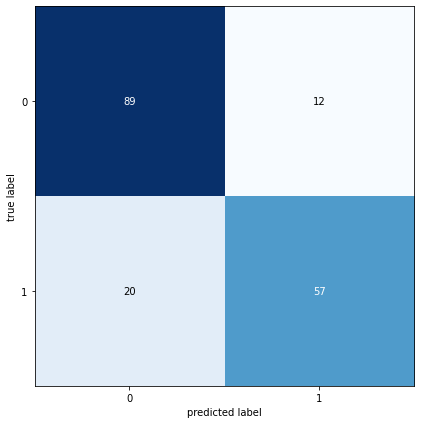

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = Dt_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

Créditos:

* Material basado en el video de [sistemas inteligentes](https://youtu.be/f0yyp16dMsM)
* Material de apoyo basado de [Codificando Bits](https://youtu.be/kqaLlte6P6o)